#  Linear Regression

## Lab Assignment - Ocean Salinity Prediction

The temp_salinity.csv file contains data of ocean, its temperature and salinity. We have to predict the salinity of the water based on its temperature. 

Perform regression analysis on the data, and answer the following questions.

#### 1. Plot a scatter plot of temp vs salinity. What is the relationship between them? 
#### 2. Calculate mean and standard deviation of salinity. Find out outliers(value greater than 2 standard deviations) in your data. List them down. 
#### 3. Filter out rows in your dataset, whose price is greater than 2 standard deviations. Plot a scatter of temp vs salinity, with outliers in a different color.
#### 4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set. 
#### 5. Predict the output with the test data set. Find out the MSE, R^2 score. Plot a scatter of test output vs obtained output. 
#### 6. Perform another split of 80:20, and repeat steps 4 & 5. Which training yields a better score, Justify. 
#### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/temp_salinity.csv')
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


#### 1. Plot a scatter plot of temp vs salinity. What is the relationship between them? 

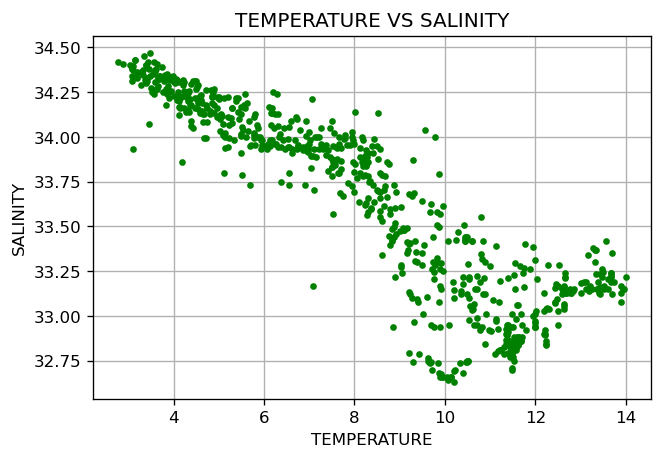

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

temp=df['T_degC']
salinity=df['Salnty']


plt.figure(dpi=120)
plt.plot(temp,salinity,'g.')
plt.grid(True)
plt.xlabel('TEMPERATURE')
plt.ylabel('SALINITY')
plt.title("TEMPERATURE VS SALINITY")
plt.show()



#### 2. Calculate mean and standard deviation of salinity. Find out outliers(value greater than 2 standard deviations) in your data. List them down. 

In [4]:
avg=df['Salnty'].mean()
std=df['Salnty'].std()
print('Mean salinity: ',avg)
print('Mean salinity: ',std)


out=2*std
print(out)
print(avg+out)
print(avg-out)

outliers=df[(df['Salnty']<=avg-out) | (df['Salnty']>=avg+out)]
print(outliers)

Mean salinity:  33.618971114167806
Mean salinity:  0.5279191105829845
1.055838221165969
34.67480933533378
32.563132893001836
Empty DataFrame
Columns: [T_degC, Salnty]
Index: []


#### 3. Filter out rows in your dataset, whose price is greater than 2 standard deviations. Plot a scatter of temp vs salinity, with outliers in a different color.



## No outlier values detected in the given dataset

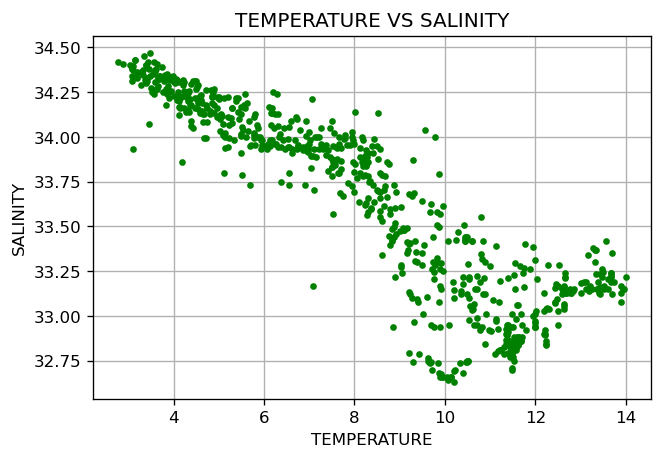

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

temp=df['T_degC']
salinity=df['Salnty']


plt.figure(dpi=120)
plt.plot(temp,salinity,'g.')
plt.grid(True)
plt.xlabel('TEMPERATURE')
plt.ylabel('SALINITY')
plt.title("TEMPERATURE VS SALINITY")
plt.show()


#### 4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set. 

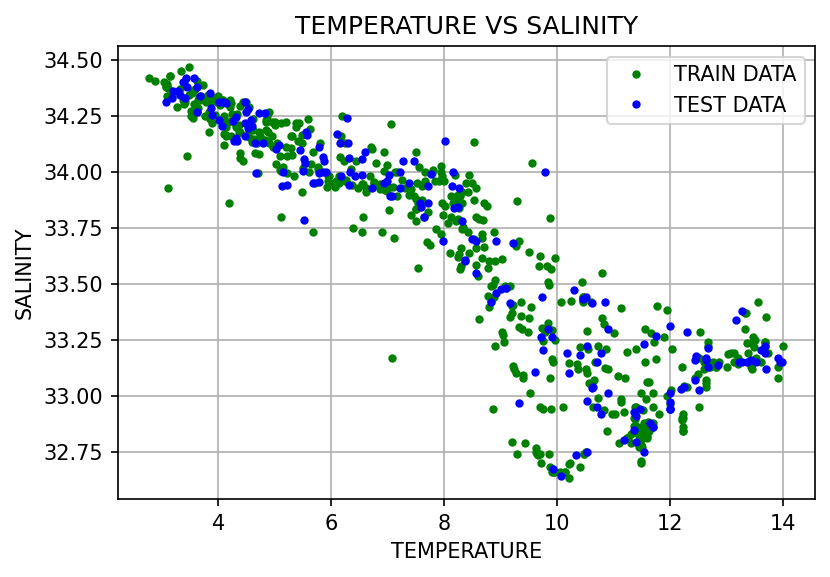

In [7]:
from sklearn.model_selection import train_test_split

temp_train,temp_test,sal_train,sal_test=train_test_split(temp,salinity,test_size=0.25)
plt.figure(dpi=150)
plt.plot(temp_train,sal_train,'g.',label='TRAIN DATA')
plt.plot(temp_test,sal_test,'b.',label='TEST DATA')

plt.legend()
plt.xlabel('TEMPERATURE')
plt.ylabel('SALINITY')
plt.title("TEMPERATURE VS SALINITY")
plt.grid(True)
plt.show()



In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
model=LinearRegression()
sal_train.dropna()
x=np.array(temp_train).reshape(-1,1)

model.fit(x,sal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

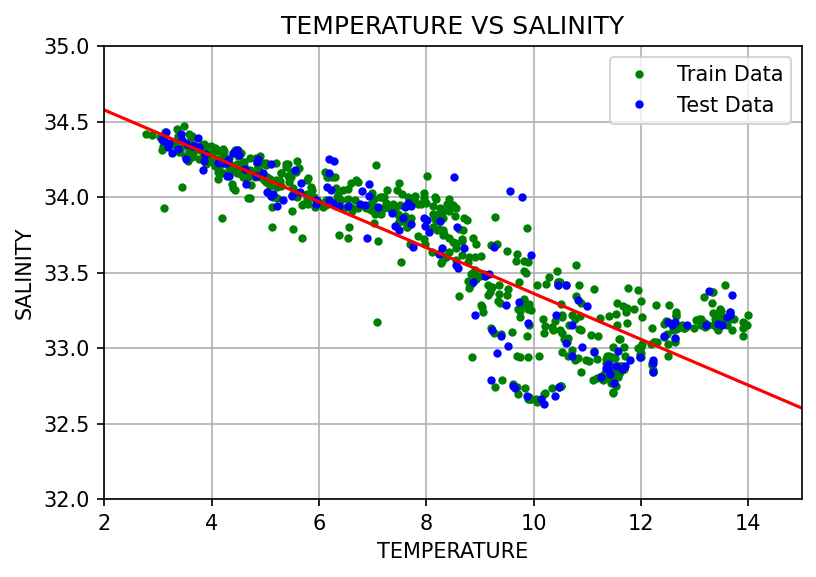

In [27]:
plt.figure(dpi=150)
plt.title("Ocean Salinity Prediction")
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.plot(temp_train,sal_train,'g.',label='Train Data')
plt.plot(temp_test,sal_test,'b.',label='Test Data')
plt.axis([2,15,32,35])
plt.grid(True)
plt.plot([0,25],[model.predict([[0]])[0],model.predict([[25]])[0]],color='r')

plt.legend()
plt.xlabel('TEMPERATURE')
plt.ylabel('SALINITY')
plt.title("TEMPERATURE VS SALINITY")
plt.grid(True)
plt.show()



#### 5. Predict the output with the test data set. Find out the MSE, R^2 score. Plot a scatter of test output vs obtained output. 

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error


x=model.predict(np.array(temp_test.tolist()).reshape(-1,1))
#print(x)
mse=mean_squared_error(sal_test,x,multioutput='uniform_average')

# print(temp_train)
# print(sal_train)
print("MSE: ",mse)
#print(sal_test)
#print(temp_test.tolist())
print("R2: ",model.score(np.array(temp_test.tolist()).reshape(-1,1),sal_test))

MSE:  0.06481102064822786
R2:  0.7820991854452903


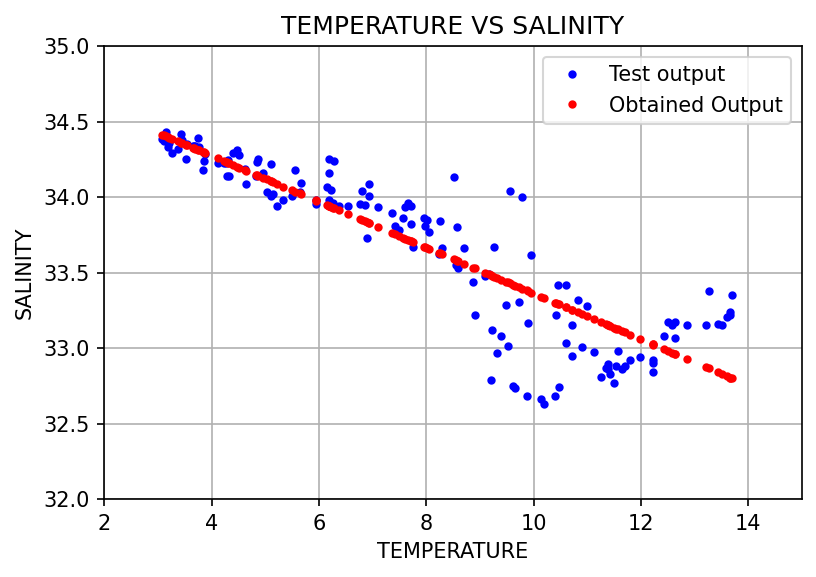

In [30]:
plt.figure(dpi=150)
plt.title("Ocean Salinity Prediction")
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.plot(temp_test,sal_test,'b.',label='Test output')
plt.plot(temp_test,model.predict(np.array(temp_test.tolist()).reshape(-1,1)),'r.',label='Obtained Output')
plt.axis([2,15,32,35])
plt.grid(True)


plt.legend()
plt.xlabel('TEMPERATURE')
plt.ylabel('SALINITY')
plt.title("TEMPERATURE VS SALINITY")
plt.grid(True)
plt.show()


### Perform another split of 80:20, and repeat steps 4 & 5. Which training yields a better score, Justify

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

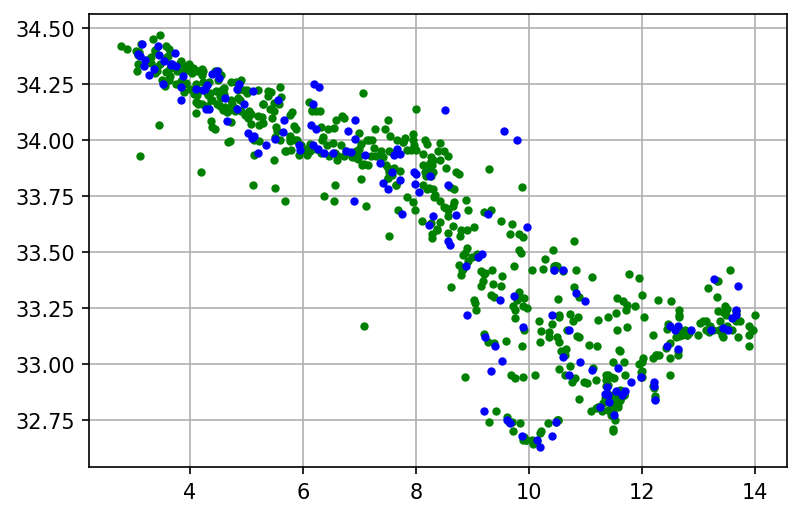

In [14]:
from sklearn.model_selection import train_test_split

temp_train,temp_test,sal_train,sal_test=train_test_split(temp,salinity,test_size=0.2)
plt.figure(dpi=150)
plt.plot(temp_train,sal_train,'g.')
plt.plot(temp_test,sal_test,'b.')
plt.grid(True)

from sklearn.linear_model import LinearRegression
import numpy as np
model=LinearRegression()
sal_train.dropna()
x=np.array(temp_train).reshape(-1,1)

model.fit(x,sal_train)

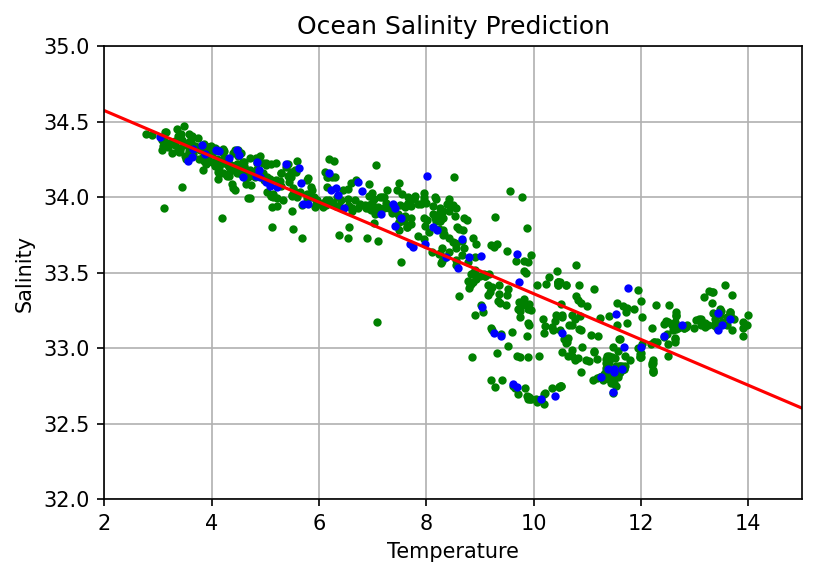

In [12]:
plt.figure(dpi=150)
plt.title("Ocean Salinity Prediction")
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.plot(temp_train,sal_train,'g.')
plt.plot(temp_test,sal_test,'b.')
plt.axis([2,15,32,35])
plt.grid(True)
plt.plot([0,25],[model.predict([[0]])[0],model.predict([[25]])[0]],color='r')

In [13]:
from sklearn.metrics import mean_squared_error



x=model.predict(np.array(temp_train.tolist()).reshape(-1,1))

mse=mean_squared_error(sal_train,x,multioutput='uniform_average')

#print(temp_test.tolist())
#print(sal_test.tolist())
print("MSE: ",mse)
print("R2: ",model.score(np.array(temp_test.tolist()).reshape(-1,1),sal_test))

MSE:  0.057356589560376856
R2:  0.7996437964174039


### The accuracy of the model increased in 80:20 split